# Dataset EDA

In [121]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Data Import
tracks = pd.read_csv('../data/cleaned/track_data.csv')
meta_scaled = pd.read_csv('../data/cleaned/scaled_with_metadata.csv')

---
## KMeans Clustering - Songs

Note: this visual is not useful for interpetation, but with plotly's hover feature, once can see how close some songs are in their audio features relative to all others. Intuitively, adjacent songs frequently appear to be from the same genre. A fun piece of interest. Perhaps a 3D plot (on 3 principal components) could do it a little more justice.

Due to Github file size requirements, this has been commented out (saves space). See presentation for plot

In [123]:
'''
# Song clustering and visualization
tracks_X = meta_scaled.select_dtypes(include = 'number').drop(columns = 'year')

km = KMeans(n_clusters = 25)
km.fit(tracks_X)

# Appending KMeans model predictions to original tracks dataframe
tracks['cluster'] = km.predict(tracks_X)

# Song cluster visualization
song_pca = PCA(n_components=2)
song_vis = song_pca.fit_transform(tracks_X)

projection = pd.DataFrame(columns=['x', 'y'], data=song_vis)
projection['title'] = tracks['name']
projection['cluster'] = tracks['cluster']
projection['genre'] = tracks['genre']

fig = px.scatter(projection, x='x', y='y', color='cluster', hover_data=['x', 'y', 'title', 'genre', 'cluster'], height = 600, width = 800)
fig.show()'''

"\n# Song clustering and visualization\ntracks_X = meta_scaled.select_dtypes(include = 'number').drop(columns = 'year')\n\nkm = KMeans(n_clusters = 25)\nkm.fit(tracks_X)\n\n# Appending KMeans model predictions to original tracks dataframe\ntracks['cluster'] = km.predict(tracks_X)\n\n# Song cluster visualization\nsong_pca = PCA(n_components=2)\nsong_vis = song_pca.fit_transform(tracks_X)\n\nprojection = pd.DataFrame(columns=['x', 'y'], data=song_vis)\nprojection['title'] = tracks['name']\nprojection['cluster'] = tracks['cluster']\nprojection['genre'] = tracks['genre']\n\nfig = px.scatter(projection, x='x', y='y', color='cluster', hover_data=['x', 'y', 'title', 'genre', 'cluster'], height = 600, width = 800)\nfig.show()"

---
## Audio Features Over Time

Here we will look at the average values of song audio features by year. This will allow us to produce time series of each feature if we desire.

In [124]:
tracks_by_year = tracks.groupby('year').mean()

tracks_by_year.tail()

,explicit,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
year,,,,,,,,,,,,,,,
2017,0.185604,44.912374,0.629107,0.657829,5.376505,-7.007952,0.580404,0.103186,0.285910,0.062808,0.199850,0.498050,121.561282,226543.552961,3.941141
2018,0.199782,44.751525,0.639602,0.654669,5.401852,-7.103862,0.563617,0.108445,0.277747,0.068887,0.195503,0.491500,121.903916,217476.261329,3.946950
2019,0.235270,47.748670,0.657881,0.642932,5.348609,-7.121911,0.560147,0.114619,0.291157,0.053511,0.190030,0.501478,122.340649,214913.466244,3.951821
2020,0.254707,49.541411,0.666070,0.647468,5.331285,-7.022740,0.550288,0.118097,0.271882,0.056940,0.193840,0.506619,122.131754,204302.378987,3.954639
2021,0.335466,47.147427,0.666207,0.628738,5.296245,-7.492987,0.508762,0.141387,0.270260,0.051921,0.182008,0.494936,121.568353,198841.999166,3.950487


Percentage of songs that contain explicit lyrics: 4.58%


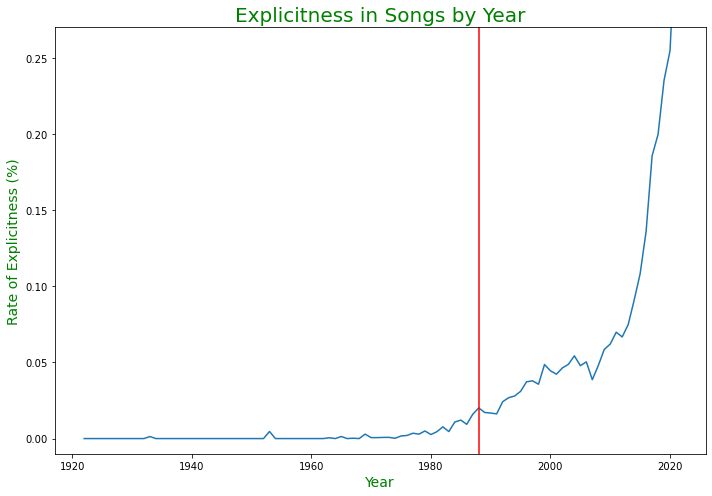

In [125]:
fig, ax = plt.subplots(figsize=(10,7))

ax.plot(tracks_by_year['explicit'])
ax.set_xlabel('Year', fontsize = 14)
ax.set_ylabel('Rate of Explicitness (%)', fontsize = 14)
ax.set_ylim(-0.01, 0.27)

ax.set_title('Explicitness in Songs by Year', fontsize = 20)
plt.axvline(tracks[tracks['genre'] == 'hip hop']['year'].min(), color = 'red') #The introduction of hip hop -> big rise in use of explicit words

fig.tight_layout()

print(f'Percentage of songs that contain explicit lyrics: {round((tracks[tracks["explicit"] == 1].shape[0] / tracks.shape[0]) * 100, 2)}%')


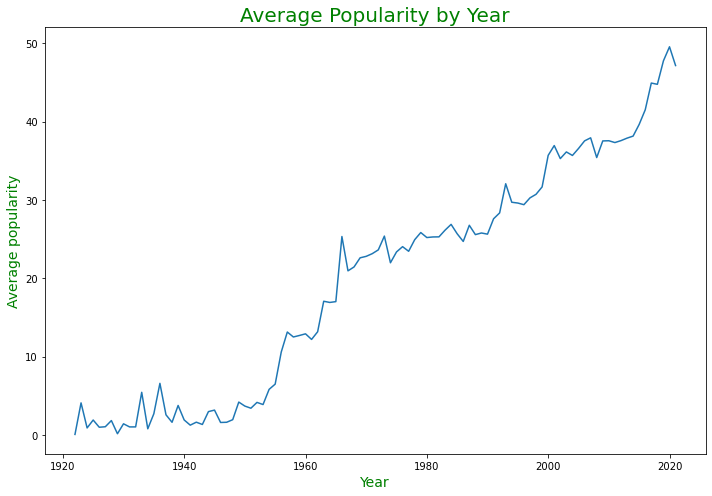

In [126]:
fig, ax = plt.subplots(figsize=(10,7))

ax.plot(tracks_by_year['popularity'])
ax.set_xlabel('Year', fontsize = 14)
ax.set_ylabel('Average popularity', fontsize = 14)

ax.set_title('Average Popularity by Year', fontsize = 20)

fig.tight_layout()

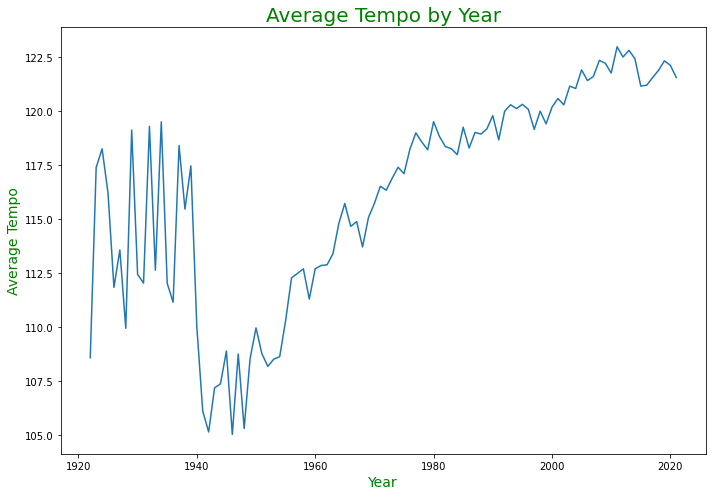

In [127]:
fig, ax = plt.subplots(figsize=(10,7))

ax.plot(tracks_by_year['tempo'])
ax.set_xlabel('Year', fontsize = 14)
ax.set_ylabel('Average Tempo', fontsize = 14)

ax.set_title('Average Tempo by Year', fontsize = 20)

fig.tight_layout()

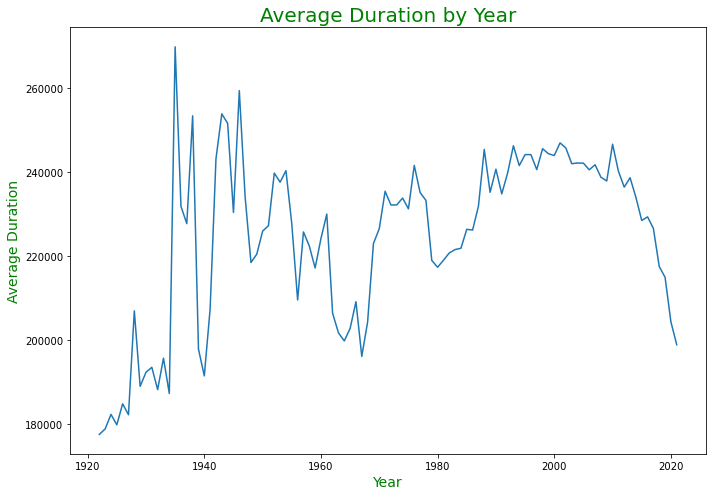

In [128]:
fig, ax = plt.subplots(figsize=(10,7))

ax.plot(tracks_by_year['duration_ms'])
ax.set_xlabel('Year', fontsize = 14)
ax.set_ylabel('Average Duration', fontsize = 14)

ax.set_title('Average Duration by Year', fontsize = 20)

fig.tight_layout()

---
## Audio Features by Genre

Sorting by genre, we can see the top songs in various areas (such as energy, loudness).

In [130]:
by_genre = tracks.groupby('genre').mean()
#by_genre = tracks.drop(columns = 'cluster').groupby('genre').mean()   # --> use if have cluster vis in notebook

print(by_genre.shape)
by_genre.head()

(3621, 16)


,year,explicit,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
genre,,,,,,,,,,,,,,,,
21st century classical,2010.000000,0.0,12.666667,0.130833,0.017400,1.333333,-35.009333,0.666667,0.039267,0.870667,0.608837,0.194333,0.040467,77.804667,216977.666667,2.000000
432hz,2009.000000,0.0,43.000000,0.486000,0.814000,11.000000,-5.225000,0.000000,0.040500,0.014700,0.000002,0.093500,0.278000,127.915000,221920.000000,4.000000
48g,2010.612903,0.0,38.451613,0.478742,0.872097,5.870968,-4.172581,0.806452,0.067961,0.176876,0.040990,0.245629,0.528519,140.351387,270657.322581,4.000000
a cappella,1990.104651,0.0,31.453488,0.570081,0.346835,5.267442,-13.353512,0.709302,0.086301,0.629633,0.012922,0.181938,0.522073,112.378616,225471.220930,3.848837
abstract,1989.794118,0.0,32.588235,0.456659,0.480100,5.352941,-16.781059,0.500000,0.052641,0.376325,0.859853,0.177135,0.294168,123.328147,369324.411765,3.941176


/var/folders/0q/wcwkj9bj71b2gqbr3g17qvqc0000gn/T/ipykernel_86919/2752010880.py:5: UserWarning:

FixedFormatter should only be used together with FixedLocator



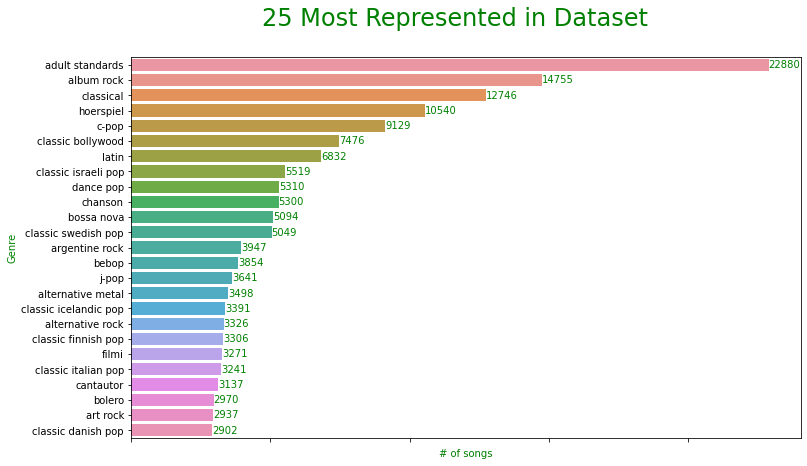

In [131]:
top_25_genres = tracks['genre'].value_counts()[:25]

fig, ax = plt.subplots(figsize=(12,7))
ax = sns.barplot(x= top_25_genres.values, y = top_25_genres.keys(), orient = 'h' )
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, fontsize = 12)
ax.bar_label(ax.containers[0])
ax.set_xlabel('# of songs')
ax.set_ylabel('Genre')
fig.suptitle('25 Most Represented in Dataset', fontsize = 24);

/var/folders/0q/wcwkj9bj71b2gqbr3g17qvqc0000gn/T/ipykernel_86919/445823017.py:8: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/0q/wcwkj9bj71b2gqbr3g17qvqc0000gn/T/ipykernel_86919/445823017.py:12: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/0q/wcwkj9bj71b2gqbr3g17qvqc0000gn/T/ipykernel_86919/445823017.py:16: UserWarning:

FixedFormatter should only be used together with FixedLocator



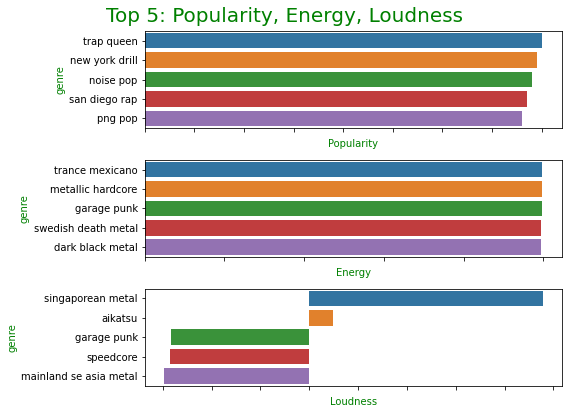

In [132]:
most_popular = by_genre['popularity'].sort_values(ascending = False)[:5]
most_energy = by_genre['energy'].sort_values(ascending = False)[:5]
most_loud = by_genre['loudness'].sort_values(ascending = False)[:5]

fig, (ax1, ax2, ax3) = plt.subplots(nrows = 3, figsize=(8,6), sharex = False)

sns.barplot(y = most_popular.keys(), x = most_popular.values, orient = 'h', ax = ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation = 90, fontsize = 12);
ax1.set_xlabel('Popularity')

sns.barplot(y = most_energy.keys(), x = most_energy.values, orient = 'h', ax = ax2)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation = 90, fontsize = 12);
ax2.set_xlabel('Energy')

sns.barplot(y = most_loud.keys(), x = most_loud.values, orient = 'h', ax = ax3)
ax3.set_xticklabels(ax3.get_xticklabels(), rotation = 90, fontsize = 12);
ax3.set_xlabel('Loudness')

fig.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.suptitle('Top 5: Popularity, Energy, Loudness', fontsize = 20);
plt.show()

Not sure why xtick labels would not work here, but they aren't necessarily needed. Relative measures are fine.